In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r'..\Data\Panama Electricity\continuous_dataset_preprocessing.csv', parse_dates= True)
df["datetime"] = df["datetime"].apply(pd.to_datetime)

# df = pd.read_csv(r'../Data/pollution.csv', parse_dates= True)

In [42]:
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43842,2020-01-03 19:00:00,1363.8664,26.686761,0.018390,0.003289,12.526505,25.796136,0.017642,0.015358,3.275159,24.139886,0.017642,0.139954,2.571955,0,0
43843,2020-01-03 20:00:00,1311.9671,26.318201,0.018259,0.001855,11.966489,25.138513,0.017466,0.010448,3.936188,23.763513,0.017695,0.139526,2.174887,0,0
43844,2020-01-03 21:00:00,1269.3826,26.048395,0.018068,0.001216,11.302663,24.564020,0.017328,0.005875,4.515085,23.431207,0.017519,0.120544,1.914421,0,0
43845,2020-01-03 22:00:00,1191.4653,25.819452,0.017854,0.000735,10.899143,24.038202,0.017129,0.002955,4.693536,23.155389,0.017305,0.097931,1.881178,0,0


In [29]:
df = df[df['pm2.5'].isnull() == False]

In [5]:
df.describe()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,holiday,school
count,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000,43847.000000
mean,1184.058372,27.380549,0.018371,0.082273,13.023407,26.868096,0.017908,0.109443,6.932746,24.678239,0.016911,0.148373,3.561074,0.062946,0.738386
std,193.503242,1.652247,0.001586,0.065833,7.147935,2.960538,0.001851,0.086247,4.053188,2.373751,0.001565,0.088245,1.708776,0.242869,0.439519
min,85.192500,22.953455,0.012054,0.000000,0.008979,19.765222,0.010385,0.000009,0.060431,19.933740,0.009655,0.000051,0.015497,0.000000,0.000000
25%,1017.373200,26.167169,0.017341,0.028343,7.392876,24.766321,0.016709,0.040138,3.915560,22.950967,0.015866,0.079224,2.298639,0.000000,0.000000
50%,1173.191100,27.108636,0.018666,0.068176,11.780340,26.140161,0.018415,0.089600,5.886448,23.981714,0.017221,0.134094,3.406283,0.000000,1.000000
75%,1332.278950,28.521524,0.019548,0.120056,18.038063,28.642038,0.019263,0.161194,9.146683,26.174997,0.018091,0.204651,4.650329,0.000000,1.000000
max,1721.515700,35.039575,0.022690,0.521240,39.229726,39.063440,0.022011,0.484985,24.483937,34.216211,0.020958,0.477783,10.288902,1.000000,1.000000


In [46]:
column_names = df.columns.tolist()
train_column_names = df.columns.tolist()
column_names.remove('datetime')
train_column_names.remove('datetime')
train_column_names.remove('nat_demand')
# for i in ['No', 'year', 'month', 'day', 'hour', 'pm2.5']:
#     column_names.remove(i)

In [47]:
from sklearn import preprocessing
holiday_le = preprocessing.LabelEncoder()
df['cbwd'] = holiday_le.fit_transform(df['cbwd']) 

KeyError: 'cbwd'

<AxesSubplot:>

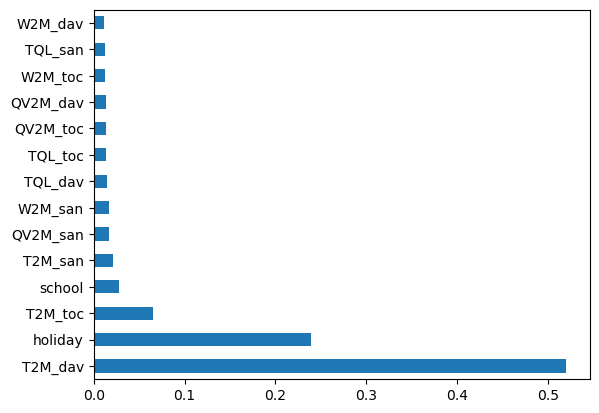

In [49]:
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

model = XGBRegressor()
model.fit(df[train_column_names],df[['nat_demand']])
#model.fit(df[column_names],df[['pm2.5']])

(pd.Series(model.feature_importances_, index=df[train_column_names].columns)
   .nlargest(len(train_column_names))
   .plot(kind='barh'))

In [49]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')
    return 

def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        
def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)


In [14]:
for name, column in df[column_names].iteritems():
    Augmented_Dickey_Fuller_Test_func(df[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: nat_demand
Test Statistic                   -21.394311
p-value                            0.000000
No Lags Used                      55.000000
Number of Observations Used    43791.000000
Critical Value (1%)               -3.430499
Critical Value (5%)               -2.861606
Critical Value (10%)              -2.566805
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: T2M_toc
Test Statistic                -1.245517e+01
p-value                        3.504060e-23
No Lags Used                   5.300000e+01
Number of Observations Used    4.379300e+04
Critical Value (1%)           -3.430499e+00
Critical Value (5%)           -2.861606e+00
Critical Value (10%)          -2.566805e+00
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: QV2M_toc
Test Statistic                -8.141872e+00
p-value                   

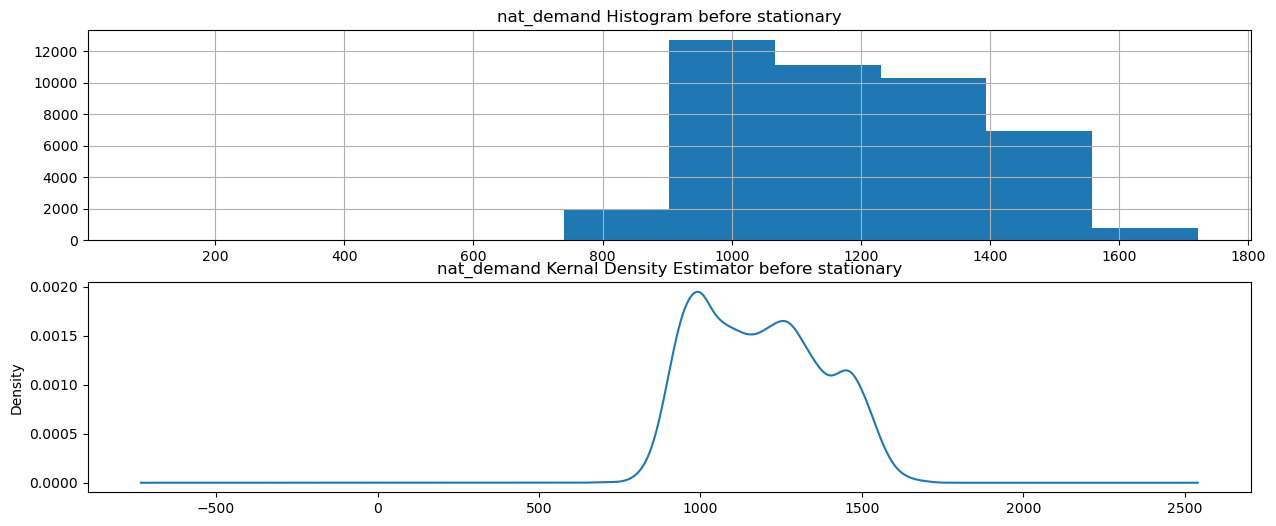

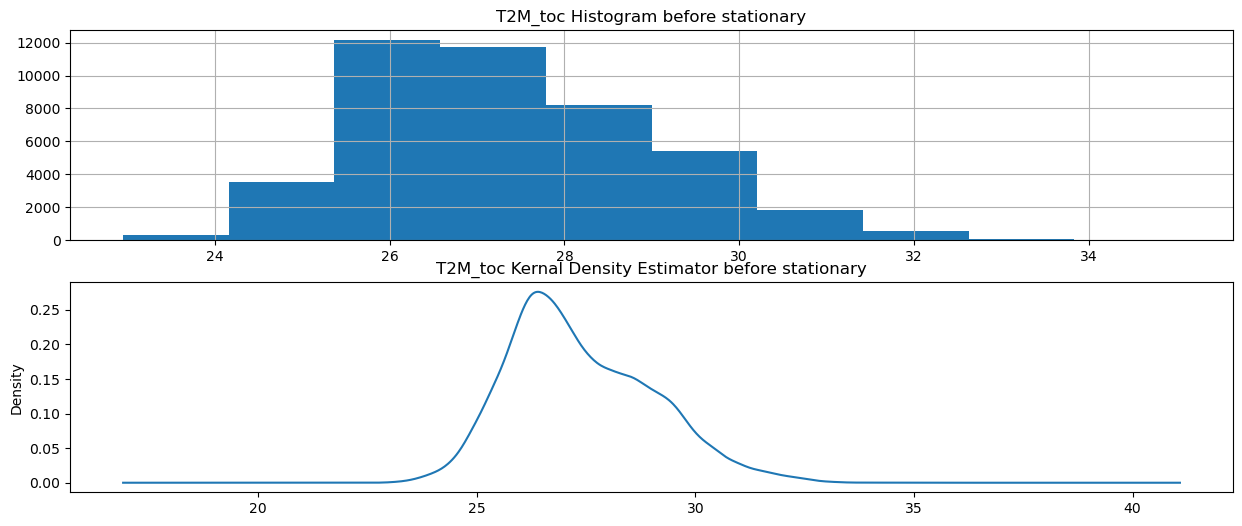

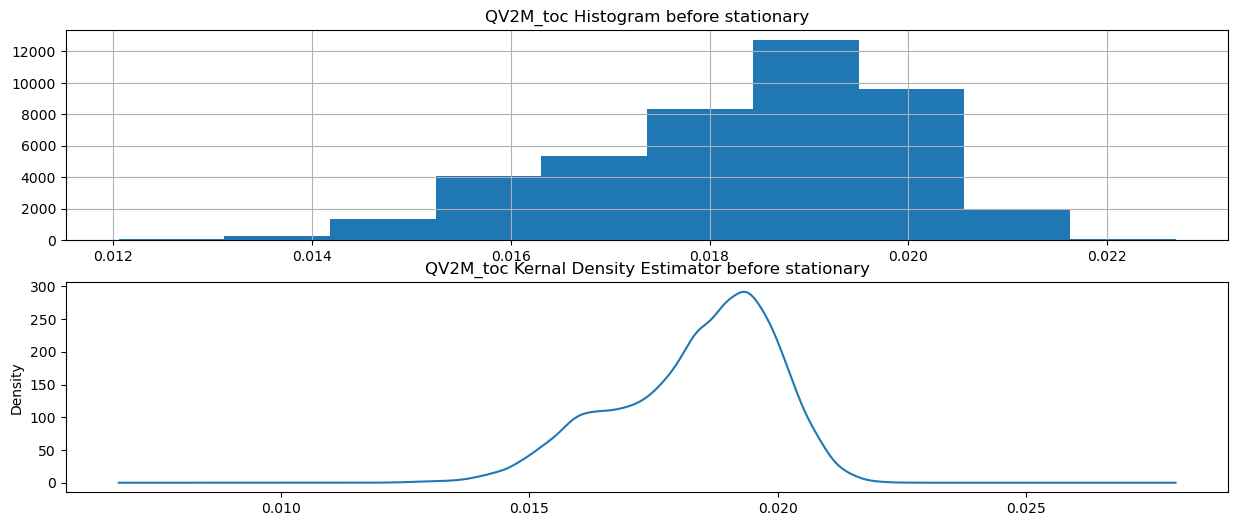

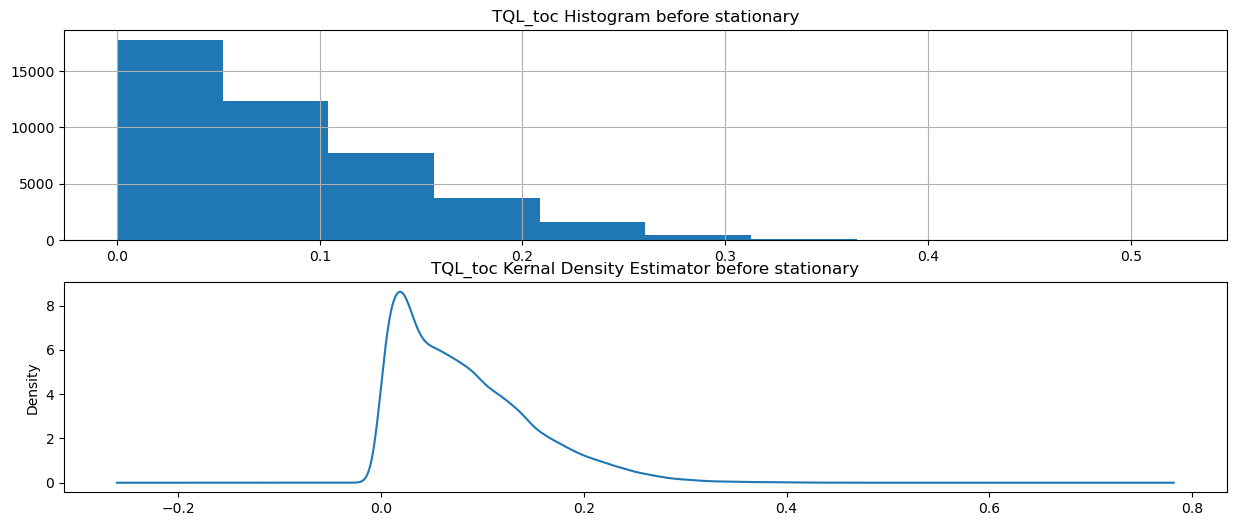

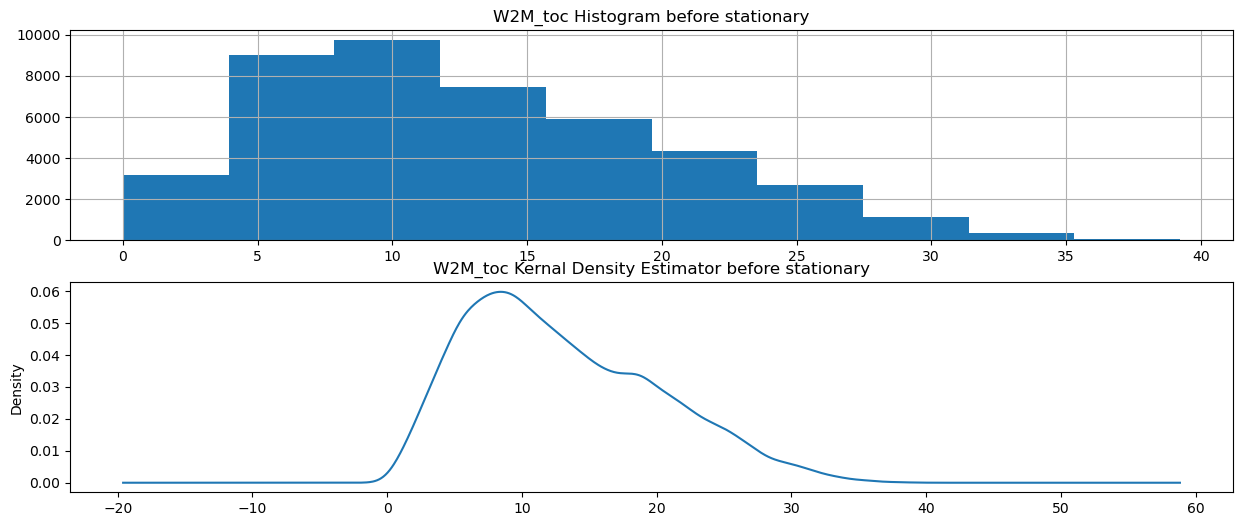

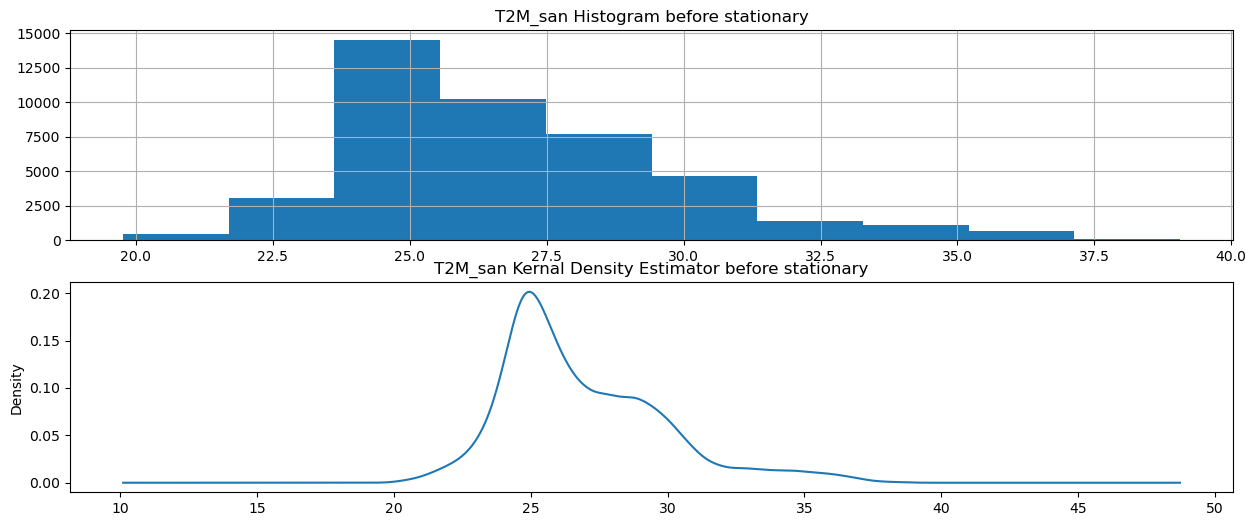

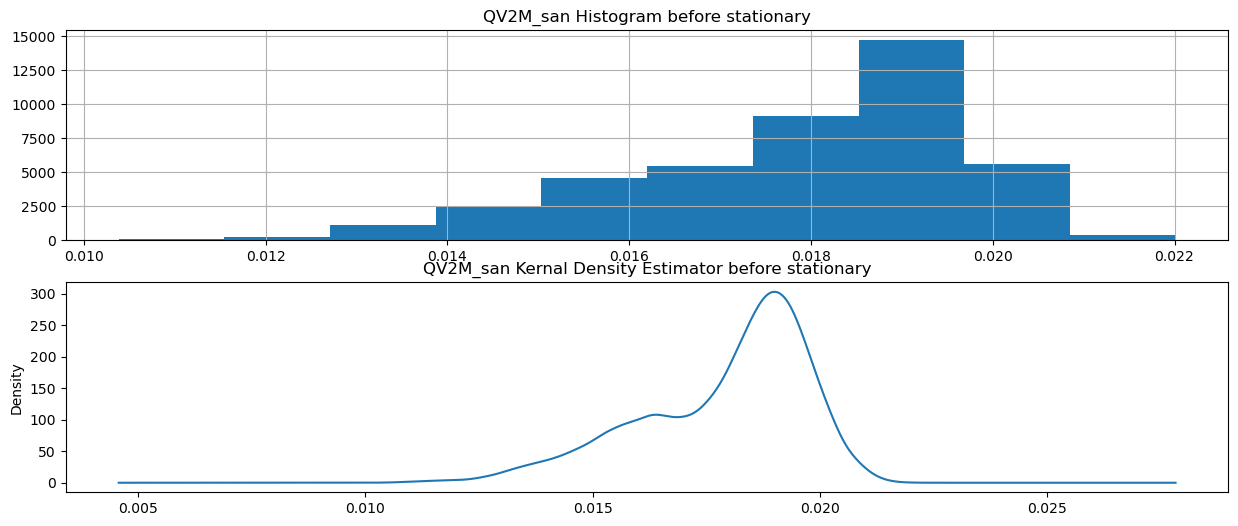

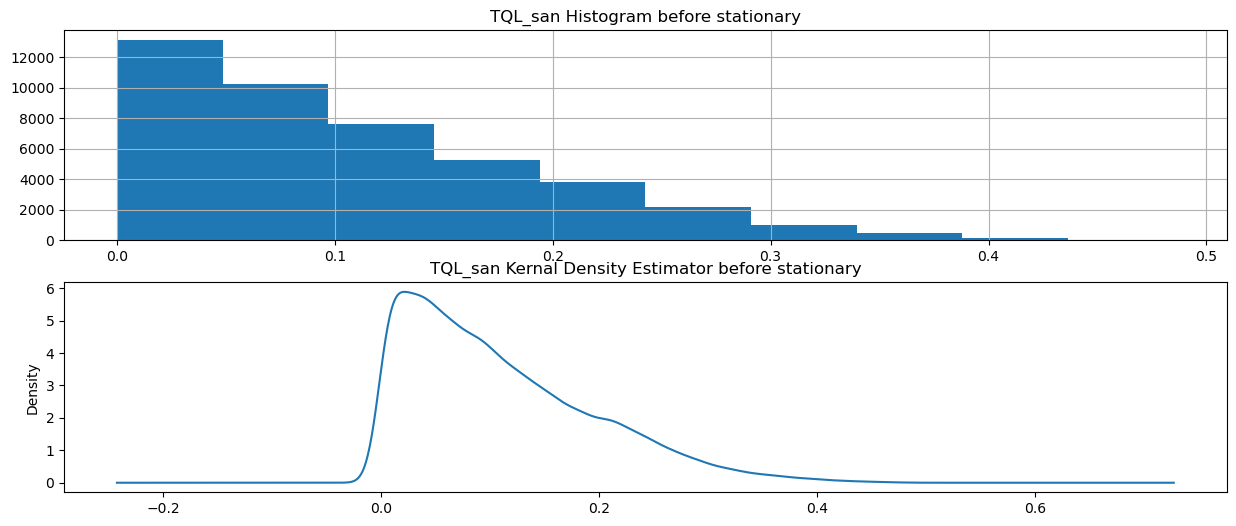

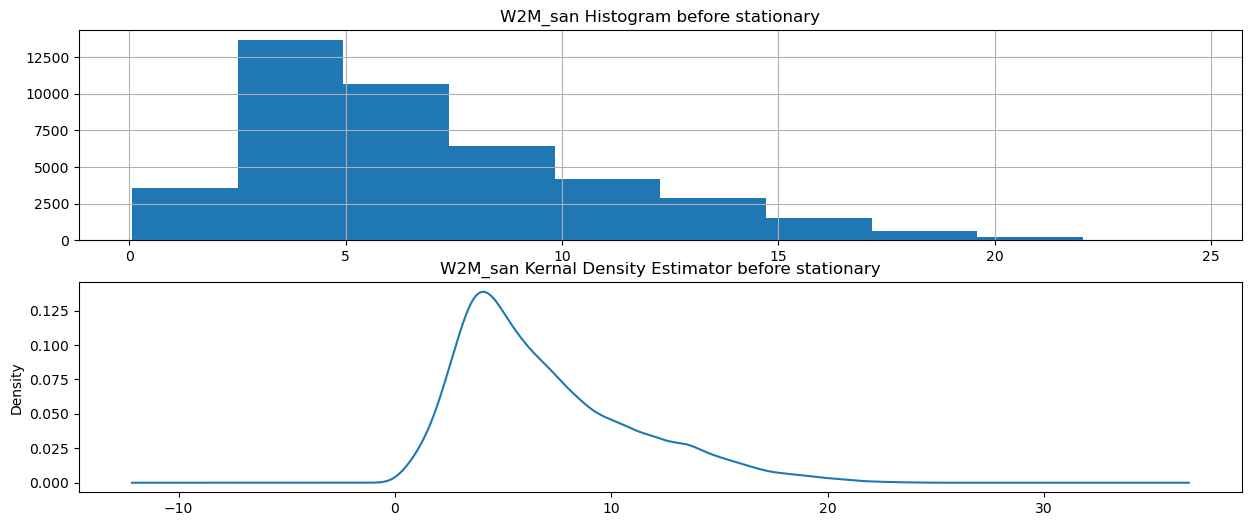

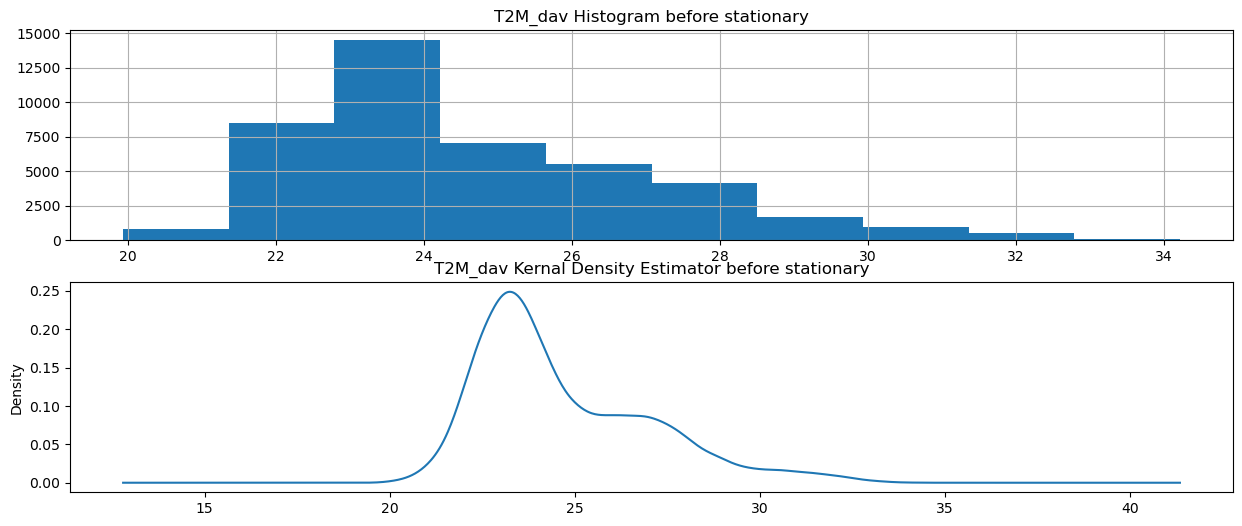

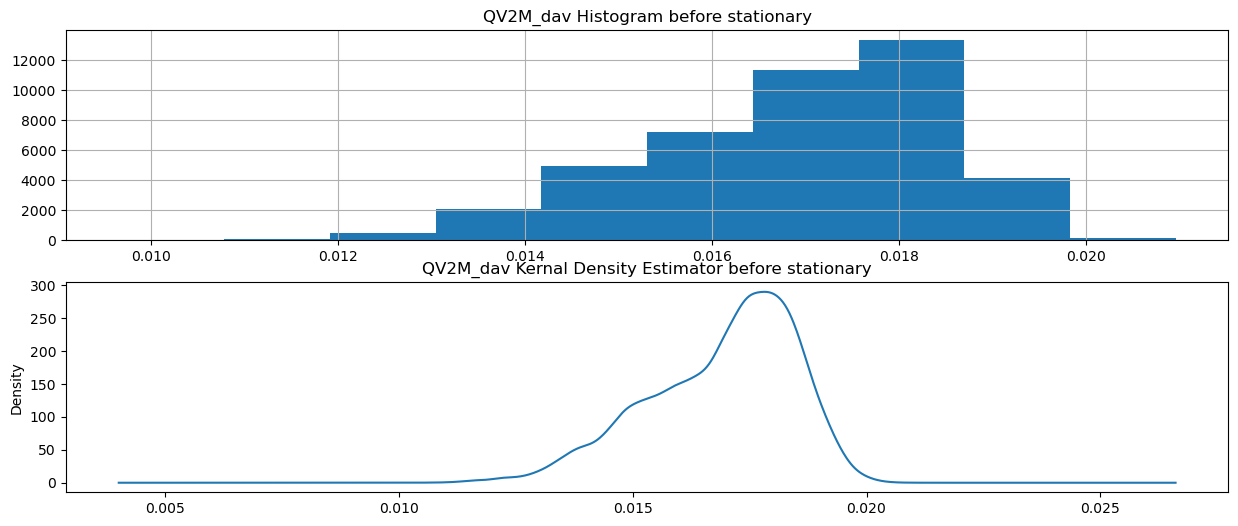

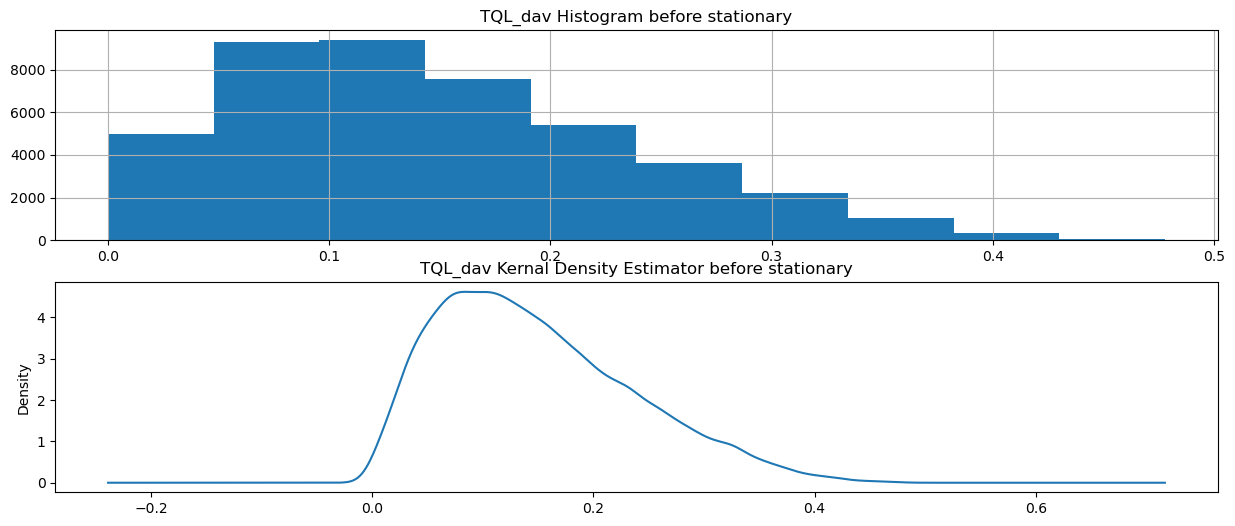

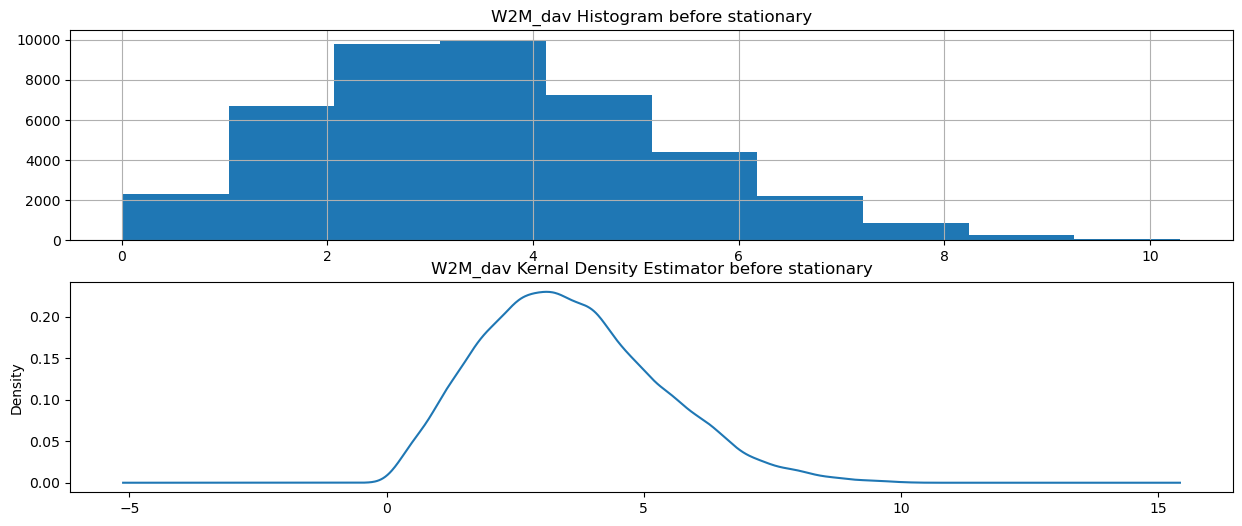

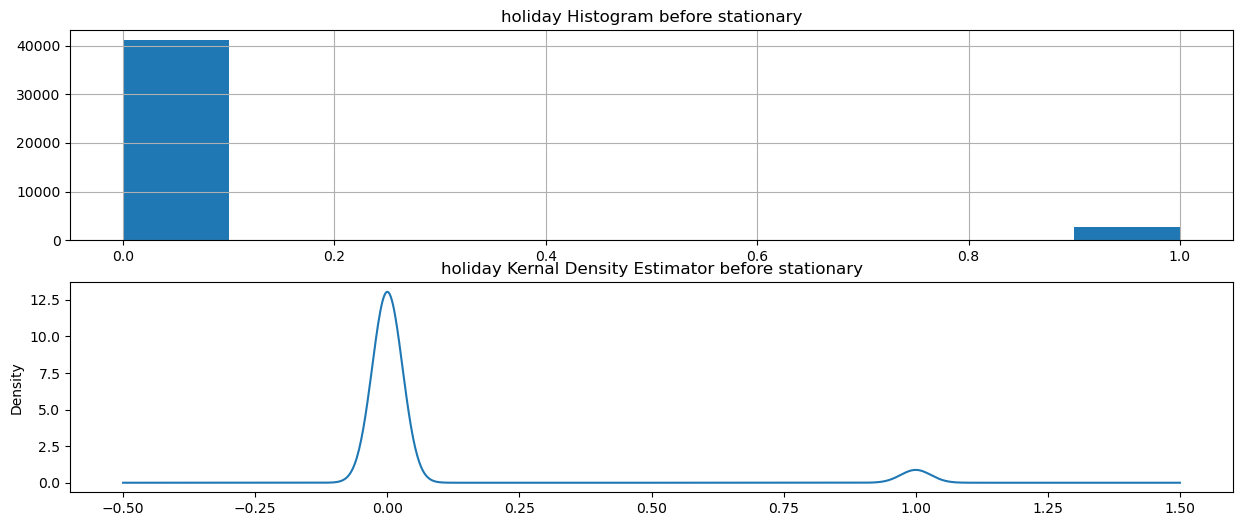

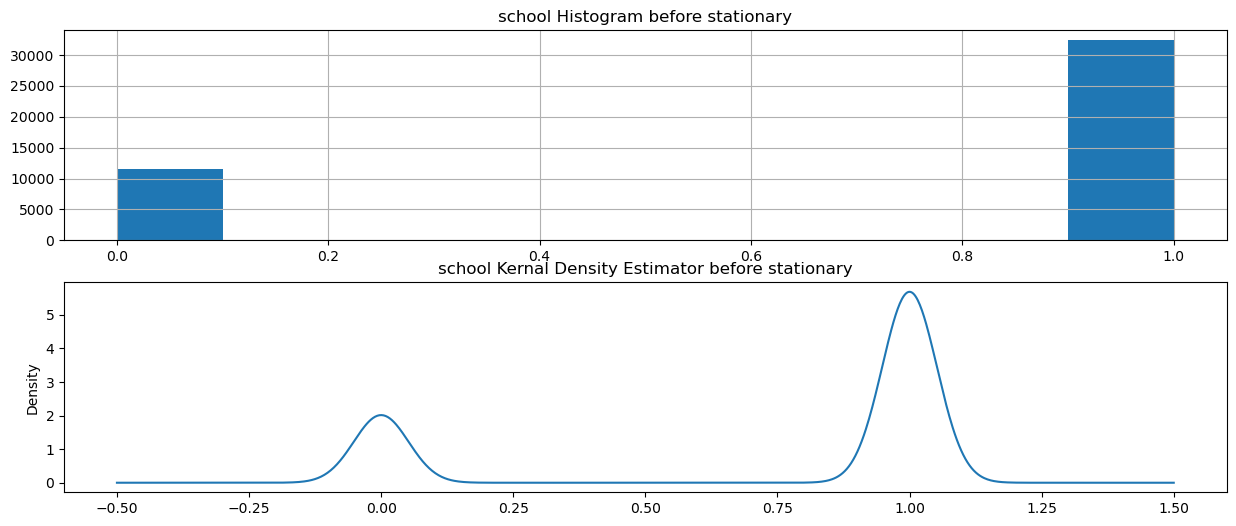

In [45]:
for c in df[column_names]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

In [40]:
train, test = df[df['datetime'] <= '1/3/2019 23:00'], df[df['datetime'] > '1/3/2019 23:00']

In [42]:
train_diff = train.diff()
train_diff.dropna(inplace = True)

In [43]:
for name, column in train_diff[column_names].iteritems():
    Augmented_Dickey_Fuller_Test_func(train_diff[name],name)
    print('\n')

Results of Dickey-Fuller Test for column: nat_demand
Test Statistic                   -32.369510
p-value                            0.000000
No Lags Used                      52.000000
Number of Observations Used    35033.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: T2M_toc
Test Statistic                   -32.541798
p-value                            0.000000
No Lags Used                      50.000000
Number of Observations Used    35035.000000
Critical Value (1%)               -3.430537
Critical Value (5%)               -2.861623
Critical Value (10%)              -2.566814
dtype: float64
Conclusion:====>
Reject the null hypothesis
Data is stationary


Results of Dickey-Fuller Test for column: QV2M_toc
Test Statistic                   -31.619279
p-value                   

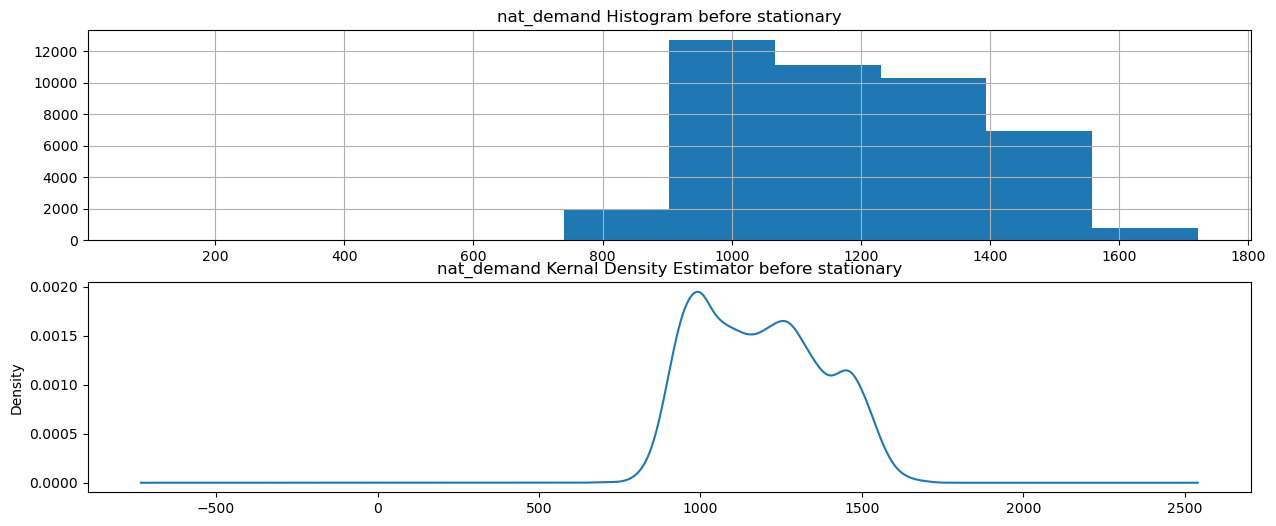

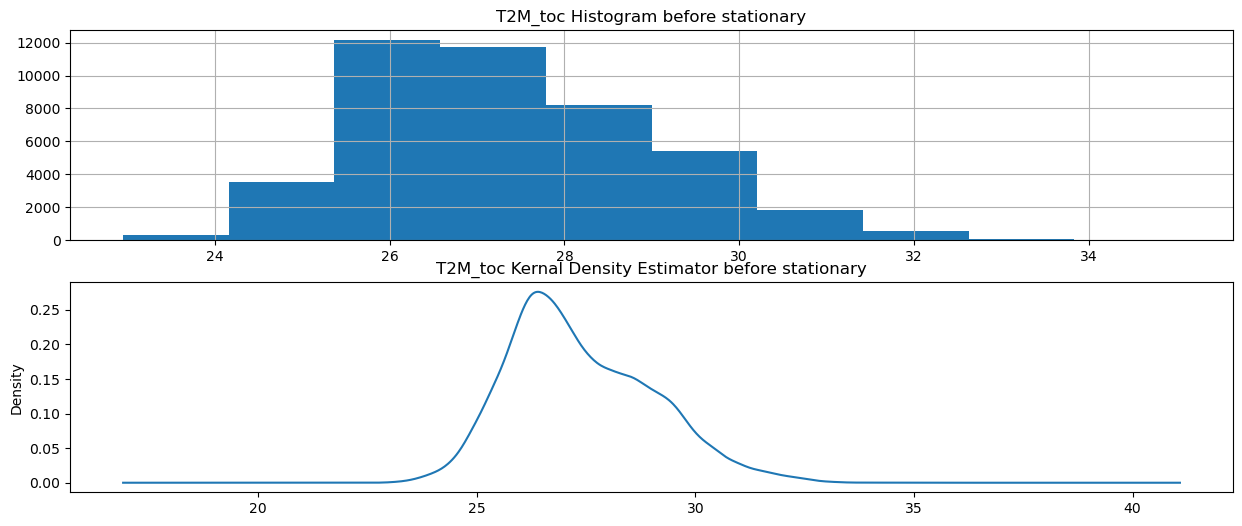

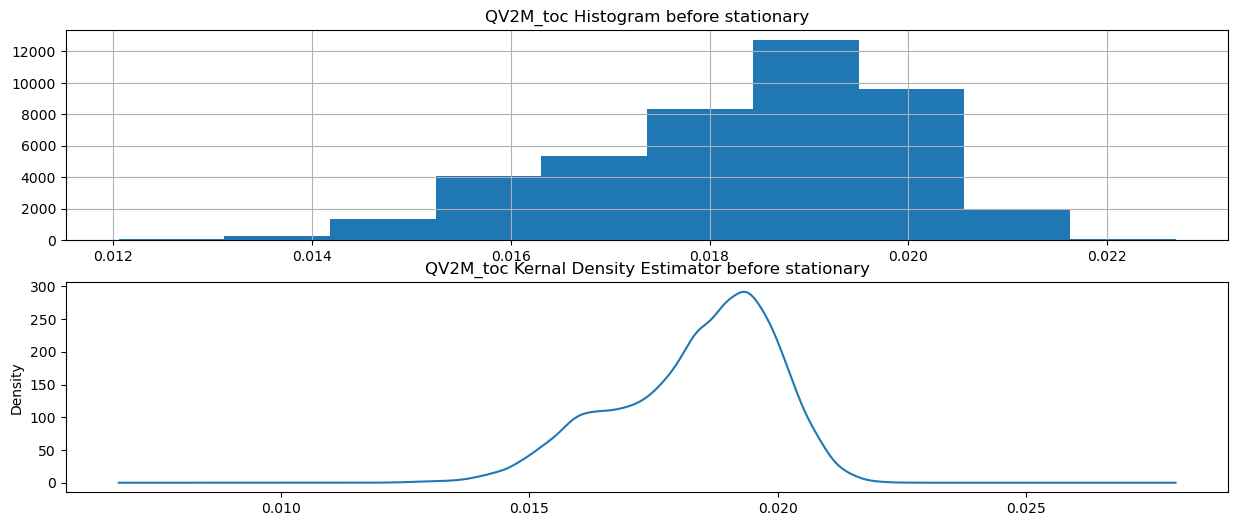

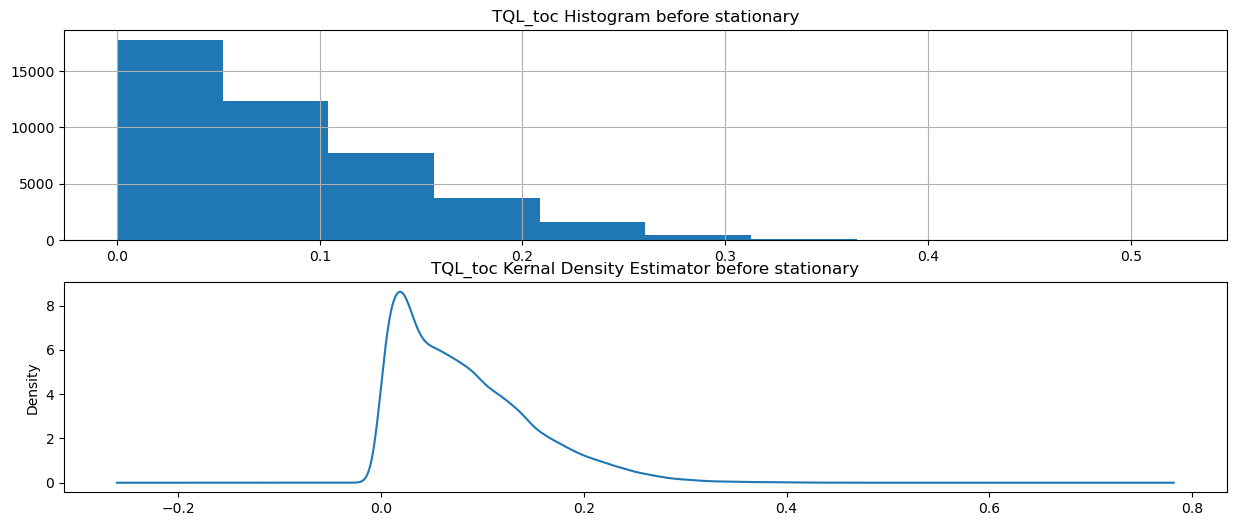

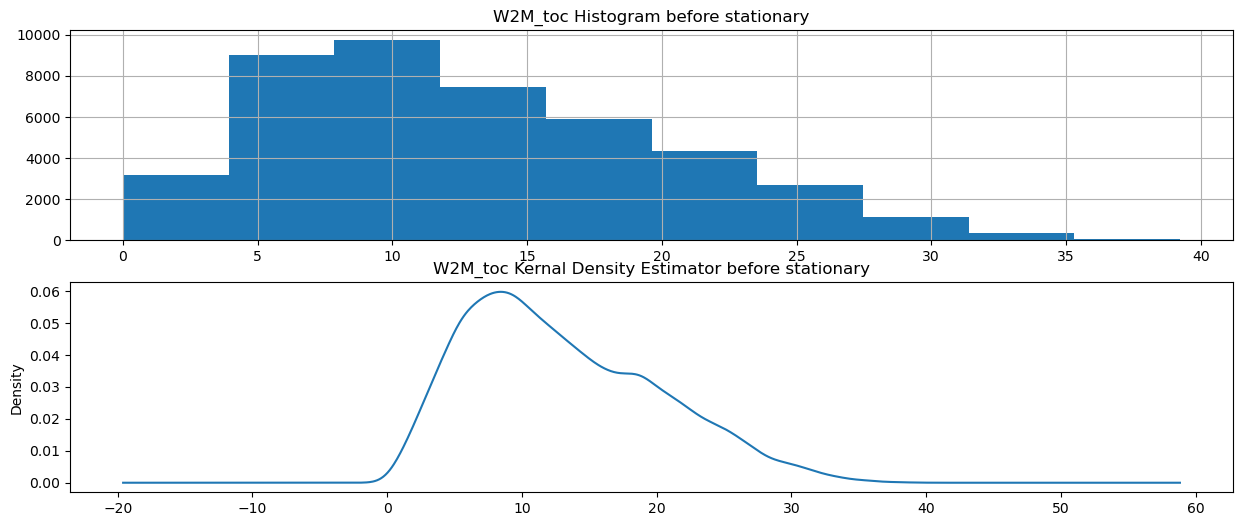

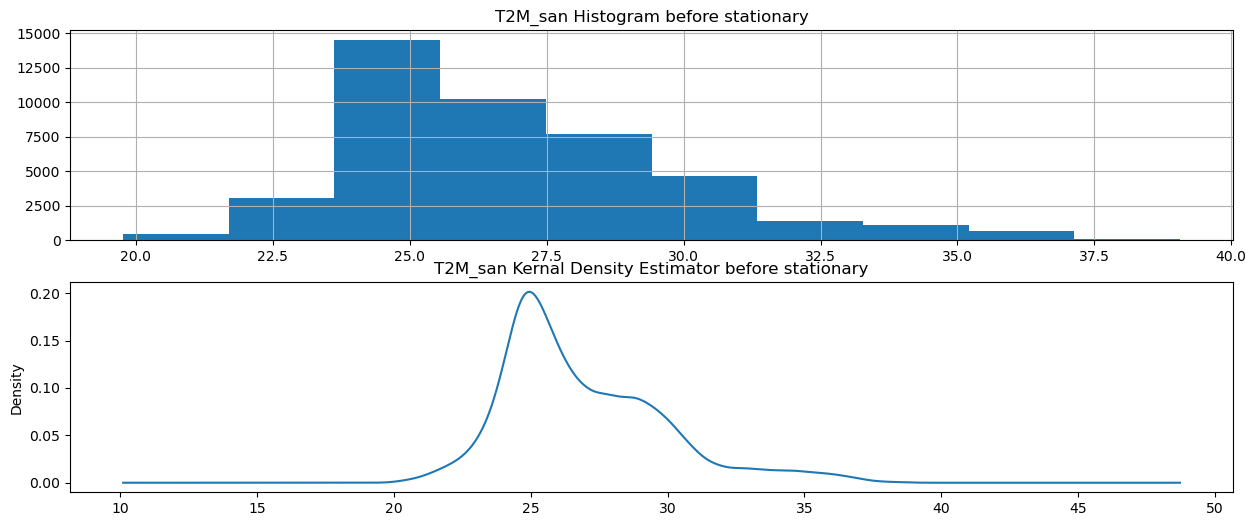

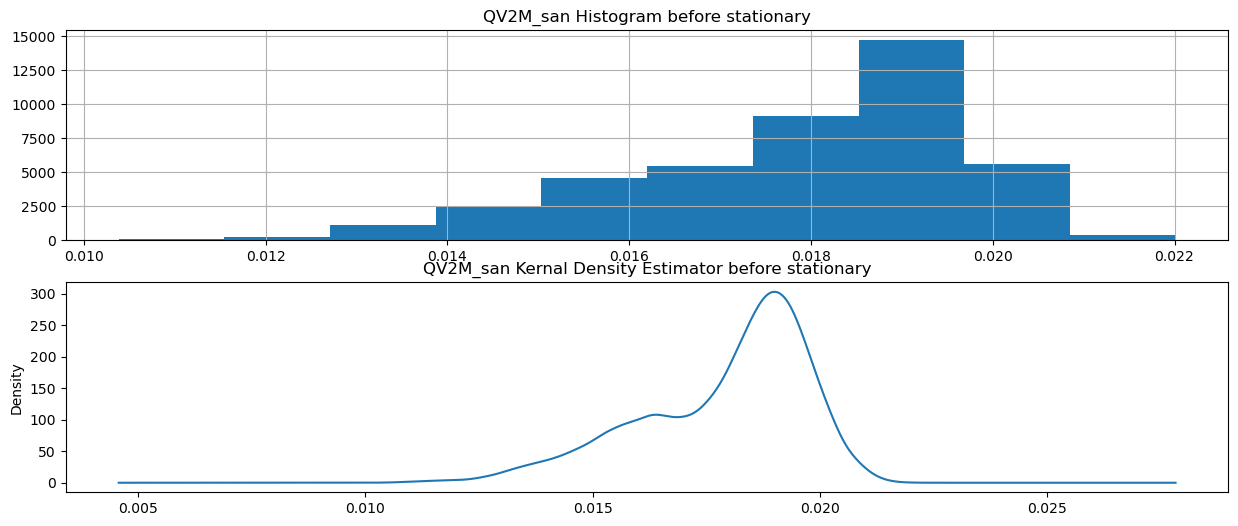

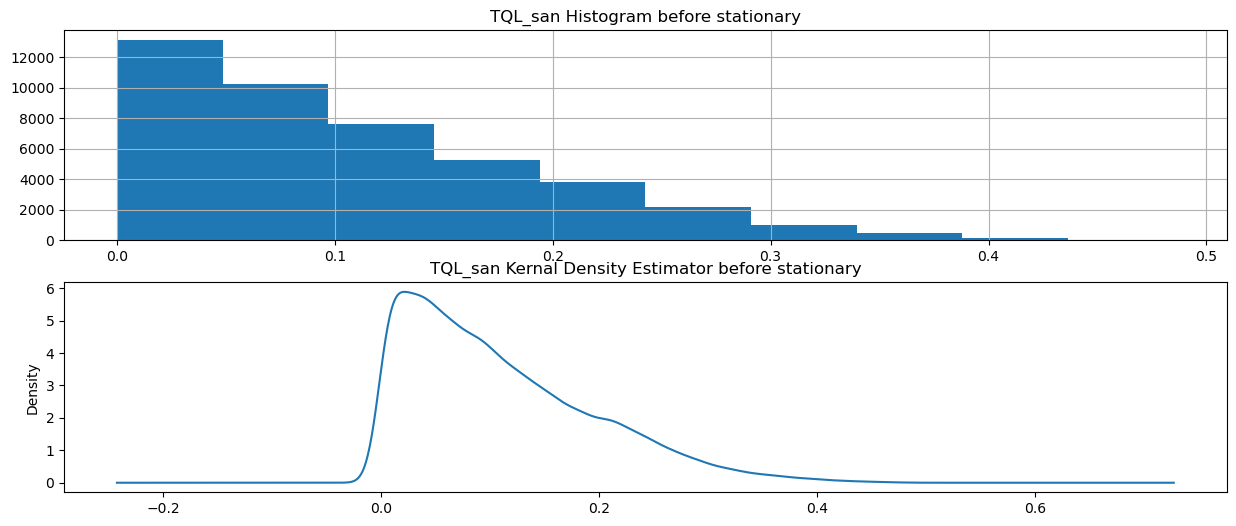

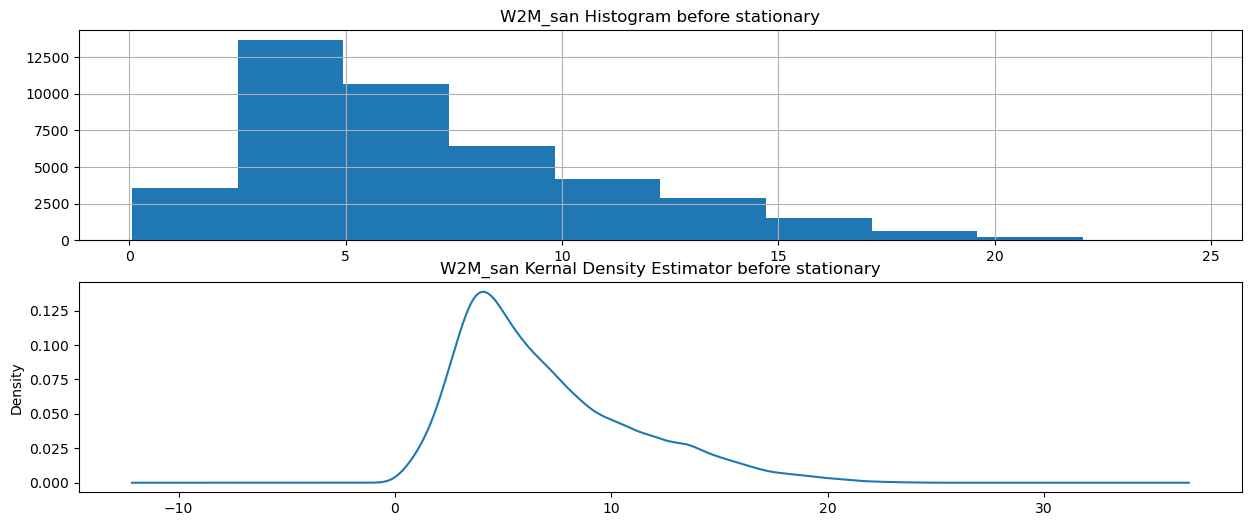

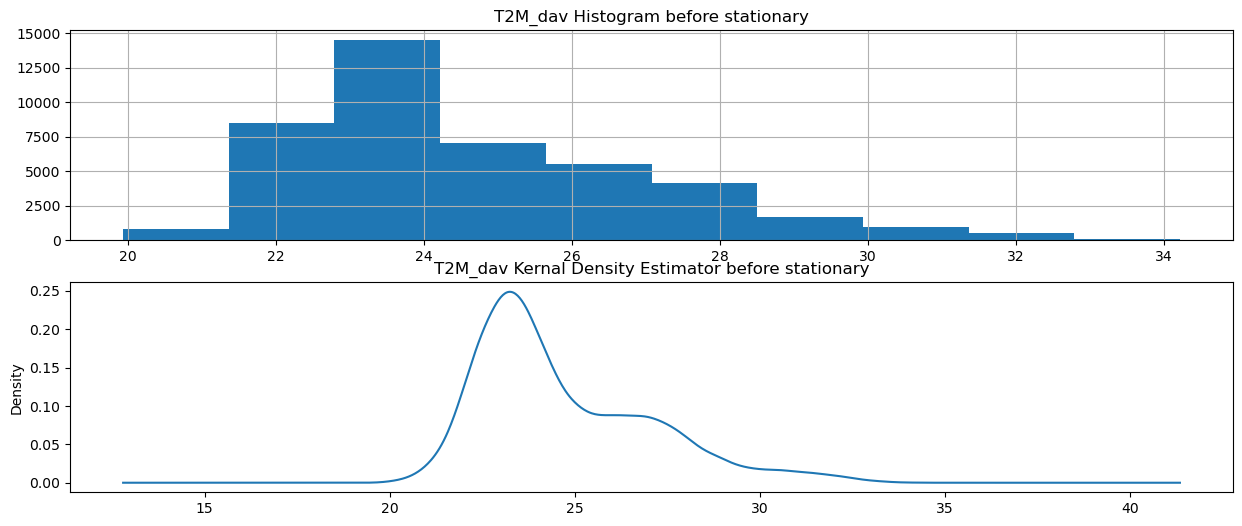

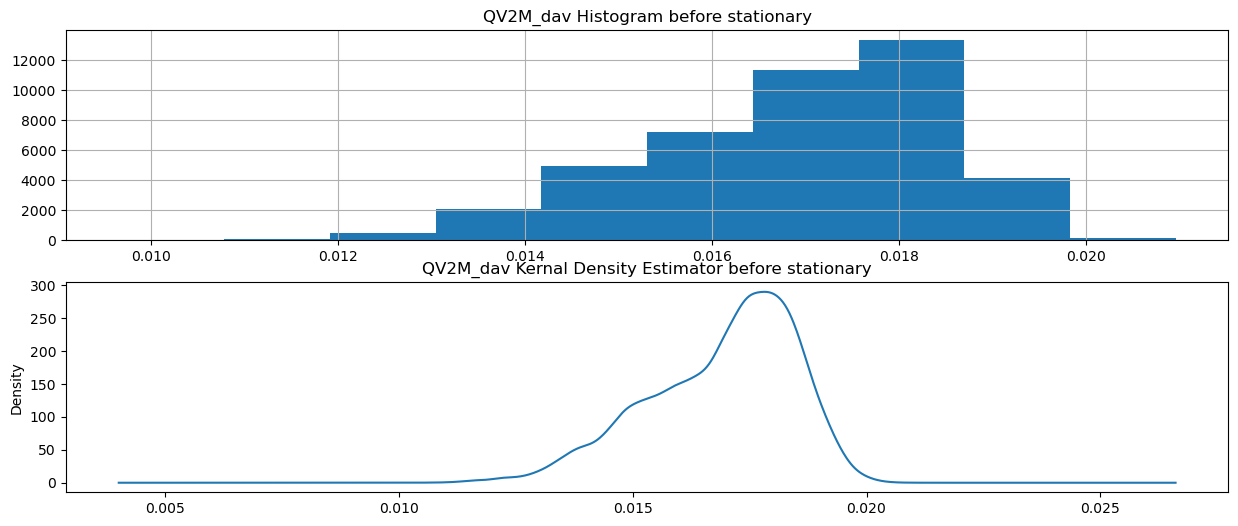

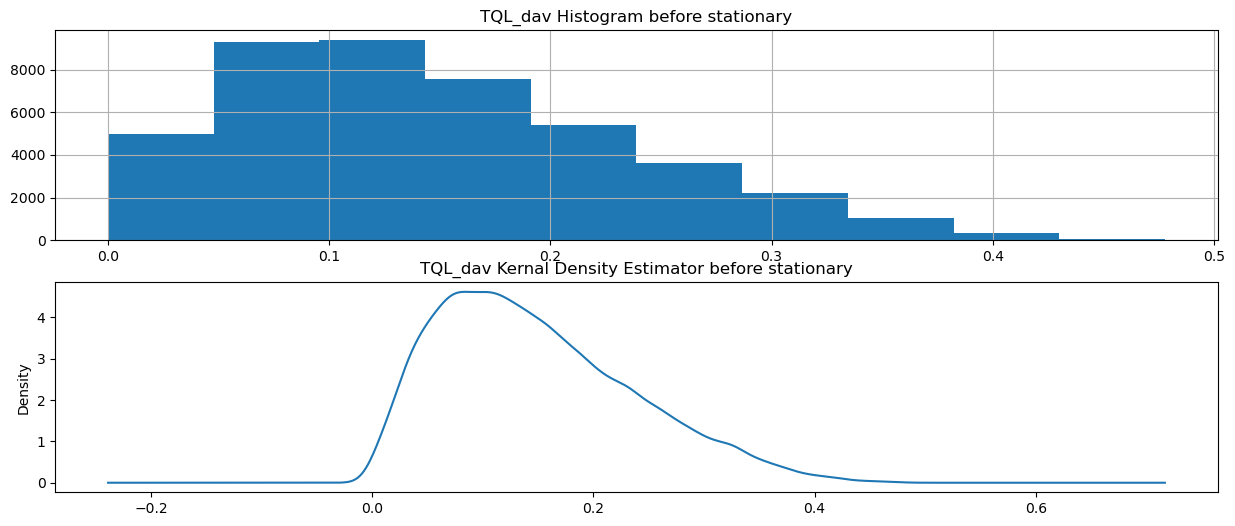

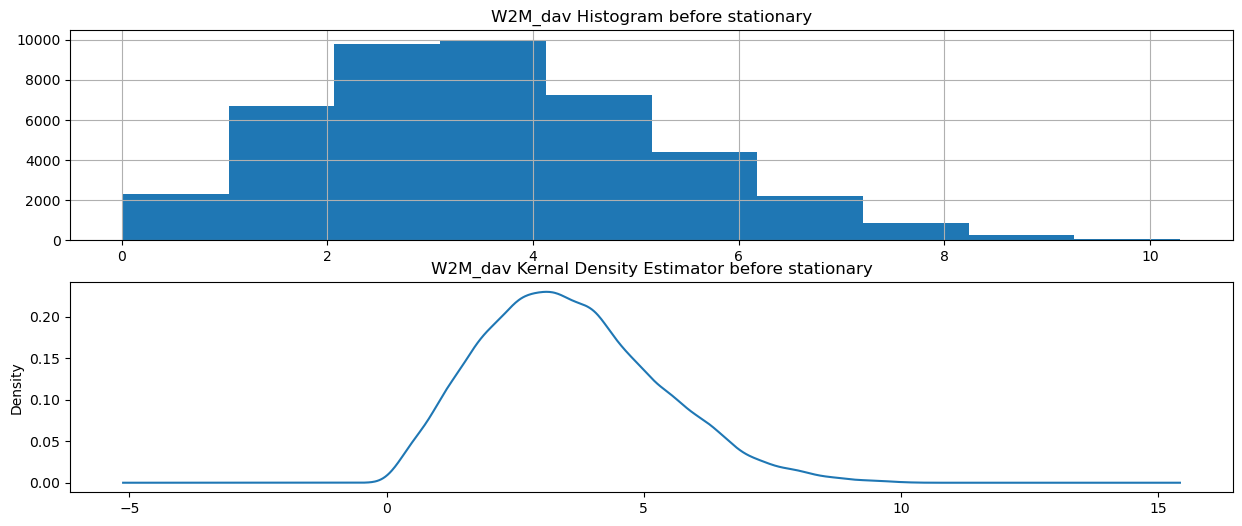

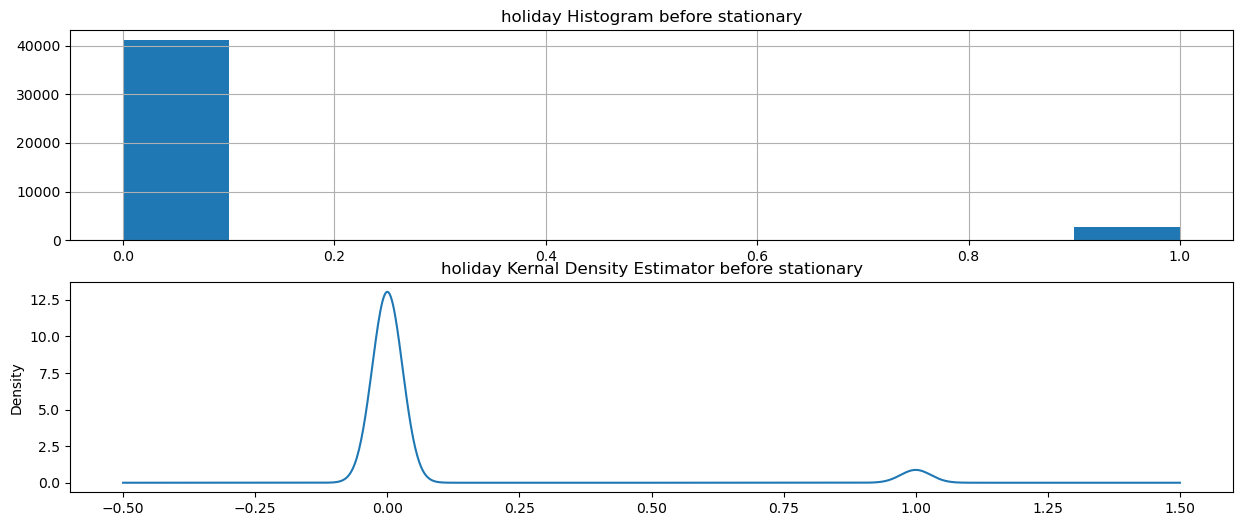

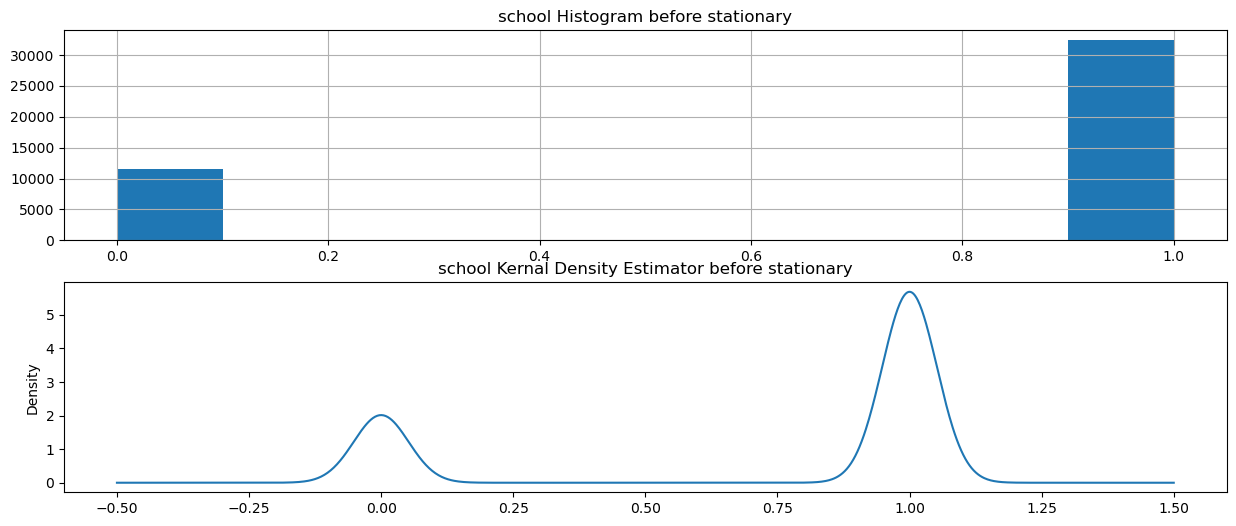

In [44]:
for c in train_diff[column_names]:
    plt.figure(1, figsize=(15,6))
    plt.subplot(211)
    plt.title(f"{str(c)} Histogram before stationary")
    df[str(c)].hist()
    plt.subplot(212)
    df[str(c)].plot(kind='kde')
    plt.title(f"{str(c)} Kernal Density Estimator before stationary")
    plt.show()

In [50]:
cointegration_test(train_diff[column_names])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
nat_demand >  104542.91 > nan       =>   False
T2M_toc >  93378.62  > nan       =>   False
QV2M_toc >  83910.62  > nan       =>   False
TQL_toc >  75647.89  > 311.1288  =>   True
W2M_toc >  67809.7   > 263.2603  =>   True
T2M_san >  60187.55  > 219.4051  =>   True
QV2M_san >  53039.72  > 179.5199  =>   True
TQL_san >  46148.79  > 143.6691  =>   True
W2M_san >  39440.12  > 111.7797  =>   True
T2M_dav >  33115.18  > 83.9383   =>   True
QV2M_dav >  27055.16  > 60.0627   =>   True
TQL_dav >  21255.62  > 40.1749   =>   True
W2M_dav >  15555.72  > 24.2761   =>   True
holiday >  10163.28  > 12.3212   =>   True
school >  4885.28   > 4.1296    =>   True
